In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

import repository as repo

In [2]:
base_repo = "https://api.github.com/users/{user}/repos" 

In [3]:
columns = [
 'name',
 'fork',
 'created_at',
 'updated_at',
 'pushed_at',
 'size',
 'stargazers_count',
 'watchers_count',
 'language',
 'has_issues',
 'has_projects',
 'has_downloads',
 'has_wiki',
 'has_pages',
 'forks_count',
 'archived',
 'disabled',
 'open_issues_count',
 'forks',
 'open_issues',
 'watchers',
 'default_branch'
]

In [4]:
user = "eliardo"

# Repositories

In [5]:
df = repo.getRepos(user)
df

,name,fork,created_at,updated_at,pushed_at,size,stargazers_count,watchers_count,language,has_issues,...,has_pages,forks_count,archived,disabled,open_issues_count,forks,open_issues,watchers,default_branch,year
0,account-manager-api-rest,True,2021-01-14 01:44:46+00:00,2021-01-16 19:05:56+00:00,2021-01-16 18:54:40+00:00,28,0,0,JavaScript,False,...,False,0,False,False,0,0,0,0,master,2021
1,recipes,False,2020-10-21 20:13:03+00:00,2020-10-26 03:54:59+00:00,2020-10-26 03:54:57+00:00,17,0,0,JavaScript,True,...,False,0,False,False,0,0,0,0,main,2020
2,spring-boot-examples,True,2018-10-21 16:33:46+00:00,2018-10-21 16:33:48+00:00,2018-04-17 18:03:56+00:00,280,0,0,Java,False,...,False,0,False,False,0,0,0,0,master,2018
3,star-wars,False,2020-11-05 02:19:20+00:00,2020-11-05 02:50:28+00:00,2020-11-05 02:50:26+00:00,14,0,0,JavaScript,True,...,False,0,False,False,0,0,0,0,main,2020
4,user-and-login,True,2021-01-21 02:49:31+00:00,2021-01-21 03:00:45+00:00,2021-01-21 02:58:39+00:00,39,0,0,JavaScript,False,...,False,0,False,False,0,0,0,0,main,2021


## Languages

In [6]:
df1 = repo.creationFromYear(df)

<AxesSubplot:title={'center':'Criação de Repositórios por Linguagem e por Ano'}, xlabel='year'>

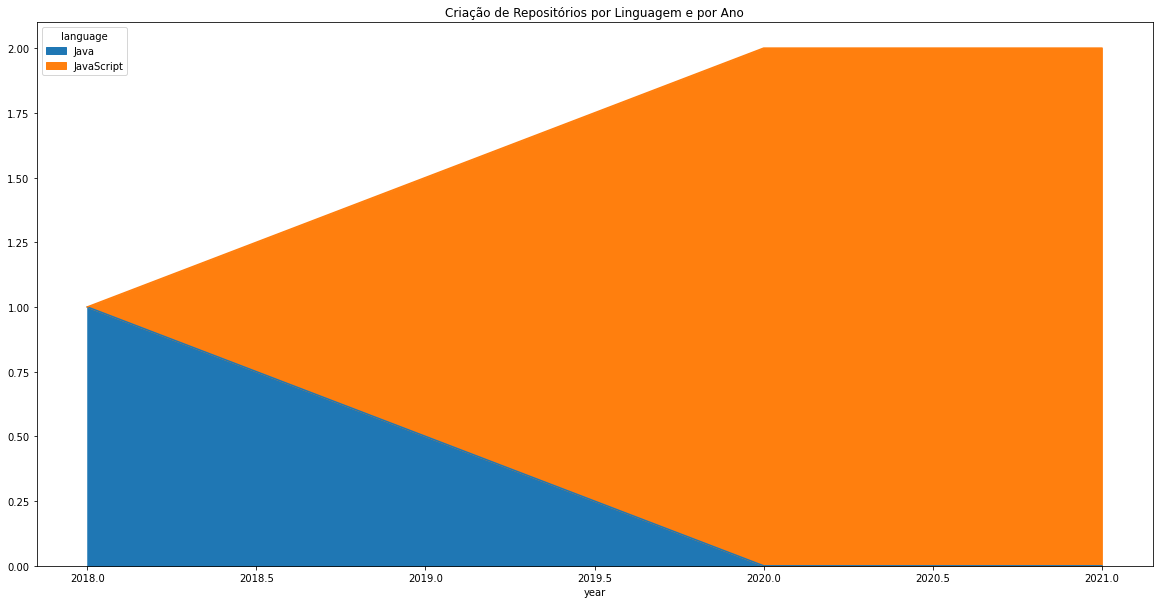

In [7]:
df1.plot(kind="area", figsize=(20,10), title="Criação de Repositórios por Linguagem e por Ano")

## Quantidade de Código

In [8]:
languages = df[["language", "year", "size"]]
lg1 = languages.groupby(["language", "year"])["size"].sum().reset_index(name="size")

df2 = lg1.pivot(index='year', columns='language', values='size')
df2 = df2.fillna(0)

df2

language,Java,JavaScript
year,,
2018,280.0,0.0
2020,0.0,31.0
2021,0.0,67.0


<AxesSubplot:title={'center':'Criação de Código por Linguagem por Ano'}, xlabel='year'>

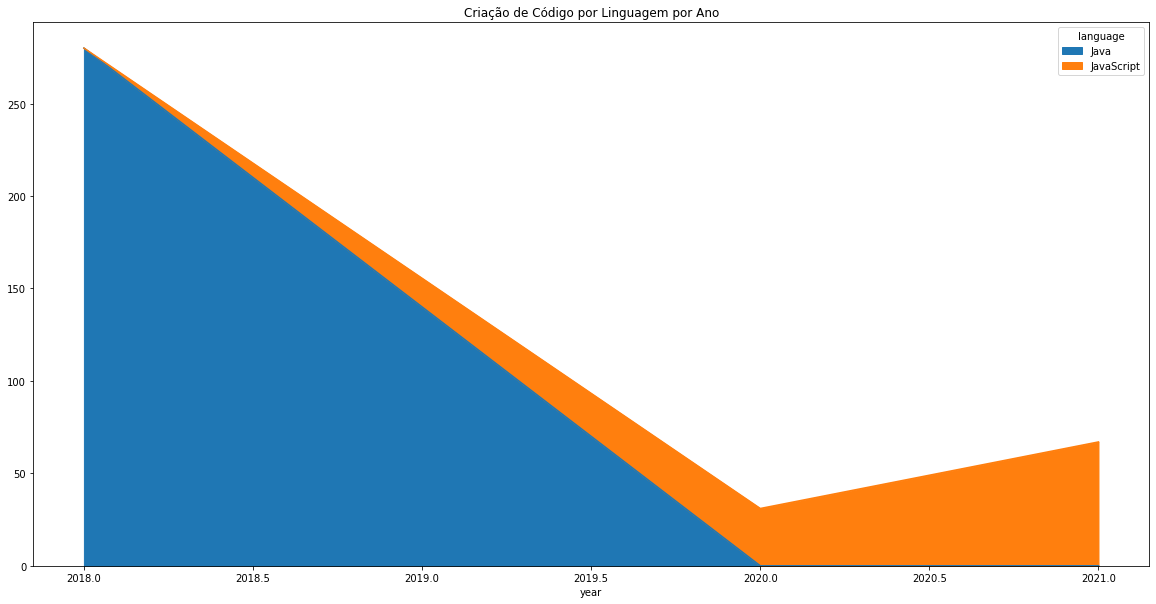

In [9]:
df2.plot(kind="area", figsize=(20,10), title="Criação de Código por Linguagem por Ano")